# WeatherPy
----

### Analysis
* The below analysis have been proven to be reasonable based on the analysis. 
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness (more so in the Northern Hemisphere). 
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 15 mph of wind. Countries with a latitude of 60-70 showed these strong wind speed. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

27c7a0691f4a78361fe4ddd23ed57a7e


## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

658

In [65]:
# Getting today's date (date that all the data will be pulled for)
from datetime import datetime

today_date = now.strftime("%m/%d/%Y")
print(today_date)

11/05/2020


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
from pprint import pprint

max_temp = []
lat = []
long = []
humidity = []
cloudiness = []
wind_speed = []
city_list = []
country_list = []
date = []

print("Beginning Data Retrieval")
print(".................................................................")
for city in cities: 
    city_name = city
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}&units=metric" 
    response = requests.get(url).json()
    
    try:
        error = response["message"] 
        print("City not found. Skipping to next city.")
        
    except: 
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        date.append(response["dt"])
        
        print(f"Processing Record {cities.index(city) + 1} | {city_name}")
     
print(len(city_list))        
    

Beginning Data Retrieval
.................................................................
Processing Record 1 | ushuaia
Processing Record 2 | dikson
Processing Record 3 | cabo san lucas
Processing Record 4 | oranjemund
Processing Record 5 | cape town
Processing Record 6 | kamenka
Processing Record 7 | upernavik
Processing Record 8 | rikitea
City not found. Skipping to next city.
Processing Record 10 | mar del plata
Processing Record 11 | hermanus
Processing Record 12 | honiara
Processing Record 13 | georgetown
Processing Record 14 | la palma
Processing Record 15 | mataura
City not found. Skipping to next city.
Processing Record 17 | ouadda
Processing Record 18 | dzerzhinsk
Processing Record 19 | kalas
Processing Record 20 | hasaki
Processing Record 21 | new norfolk
Processing Record 22 | tuktoyaktuk
Processing Record 23 | ulaangom
Processing Record 24 | puerto leguizamo
City not found. Skipping to next city.
City not found. Skipping to next city.
Processing Record 27 | itapaci
Process

Processing Record 243 | salinas
Processing Record 244 | bichena
Processing Record 245 | henties bay
Processing Record 246 | kungurtug
Processing Record 247 | jeremie
Processing Record 248 | oktyabrskiy
Processing Record 249 | jacareacanga
Processing Record 250 | zhezkazgan
Processing Record 251 | faanui
Processing Record 252 | akyab
Processing Record 253 | tomatlan
Processing Record 254 | codrington
Processing Record 255 | mayor pablo lagerenza
Processing Record 256 | dalvik
Processing Record 257 | haines junction
Processing Record 258 | pevek
Processing Record 259 | kurilsk
Processing Record 260 | lugo
Processing Record 261 | tiznit
Processing Record 262 | dingle
Processing Record 263 | nanortalik
Processing Record 264 | yerbogachen
Processing Record 265 | moose factory
Processing Record 266 | laguna
Processing Record 267 | saint-pierre
Processing Record 268 | vila franca do campo
Processing Record 269 | trat
Processing Record 270 | gurupi
Processing Record 271 | flinders
Processing R

Processing Record 488 | dakar
Processing Record 489 | belmonte
Processing Record 490 | palasa
Processing Record 491 | rach gia
Processing Record 492 | cairns
Processing Record 493 | muzaffarabad
Processing Record 494 | kastamonu
Processing Record 495 | bardiyah
Processing Record 496 | labuhan
Processing Record 497 | chyhyryn
Processing Record 498 | timbiras
Processing Record 499 | grimshaw
Processing Record 500 | lazaro cardenas
Processing Record 501 | sechura
Processing Record 502 | majene
Processing Record 503 | cartagena del chaira
Processing Record 504 | waipawa
Processing Record 505 | lashio
Processing Record 506 | novyy urgal
Processing Record 507 | mount isa
Processing Record 508 | pingdingshan
Processing Record 509 | copiapo
Processing Record 510 | payo
Processing Record 511 | drawsko pomorskie
Processing Record 512 | ranikhet
Processing Record 513 | kota belud
Processing Record 514 | saint anthony
Processing Record 515 | santa cruz
Processing Record 516 | faya
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
data_summary = pd.DataFrame({"City": city_list,
                             "Country" : country_list,
                             "Latitude" : lat,
                             "Longitude" : long,
                             "Date" : date,
                             "Max Temperature" : max_temp, 
                             "Humidity" : humidity, 
                             "Cloudiness" : cloudiness, 
                             "Wind Speed" : wind_speed})

data_summary = data_summary.set_index("City")

data_summary.count()


Country            609
Latitude           609
Longitude          609
Date               609
Max Temperature    609
Humidity           609
Cloudiness         609
Wind Speed         609
dtype: int64

In [68]:
data_summary.head()

,Country,Latitude,Longitude,Date,Max Temperature,Humidity,Cloudiness,Wind Speed
City,,,,,,,,
Ushuaia,AR,-54.80,-68.30,1604590248,10.00,61,75,13.90
Dikson,RU,73.51,80.55,1604590388,-17.52,92,0,2.01
Cabo San Lucas,MX,22.89,-109.91,1604590388,25.00,61,5,1.43
Oranjemund,NA,-28.55,16.43,1604590388,17.36,80,60,5.17
Cape Town,ZA,-33.93,18.42,1604590357,21.67,82,75,7.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

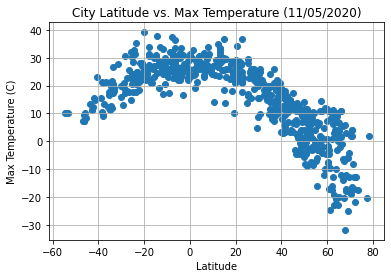

In [66]:
plt.scatter(data_summary["Latitude"], data_summary["Max Temperature"])
plt.title( f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(which="major")

#### Latitude vs. Humidity Plot

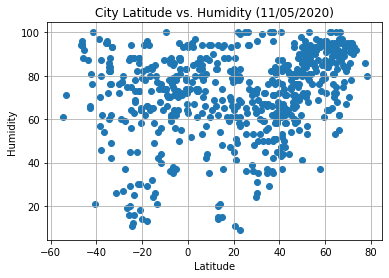

In [67]:
plt.scatter(data_summary["Latitude"], data_summary["Humidity"])
plt.title( f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(which="major")

#### Latitude vs. Cloudiness Plot

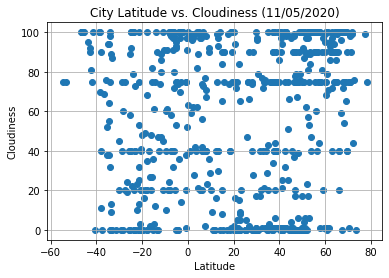

In [69]:
plt.scatter(data_summary["Latitude"], data_summary["Cloudiness"])
plt.title( f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(which="major")

#### Latitude vs. Wind Speed Plot

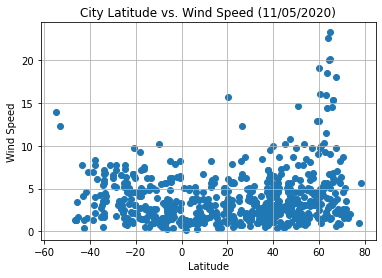

In [70]:
plt.scatter(data_summary["Latitude"], data_summary["Wind Speed"])
plt.title( f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(which="major")

## Linear Regressions : 
Northern Hemisphere (+ve latitudes)

Southern Hemisphere (-ve latitudes)

In [93]:
# Nothern Hemisphere 

north_data = data_summary.loc[data_summary["Latitude"] > 0]

# Southern Hemisphere (includes equator)
south_data = data_summary.loc[data_summary["Latitude"] <= 0]

from scipy import stats

#### Temperature vs. Latitude (for North and South)

Text(5, -20, 'y = -0.59*x + 34.99')

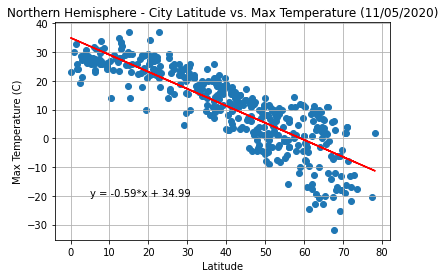

In [101]:
#Northern Hemisphere 
plt.scatter(north_data["Latitude"], north_data["Max Temperature"])
plt.title( f"Northern Hemisphere - City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(which="major")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_data["Latitude"], north_data["Max Temperature"])
regressed_values = slope * north_data["Latitude"] + intercept 

plt.plot(north_data["Latitude"], regressed_values, color="r")
plt.annotate(f"y = {round(slope,2)}*x + {round(intercept,2)}", xy=(5,-20))

Text(-50, 30, 'y = 0.36*x + 30.47')

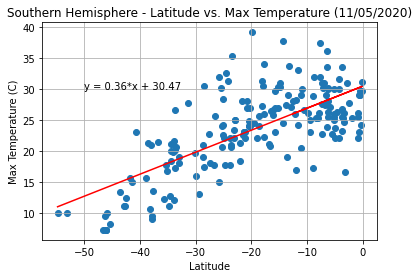

In [103]:
#Southern Hemisphere 
plt.scatter(south_data["Latitude"], south_data["Max Temperature"])
plt.title( f"Southern Hemisphere - Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(which="major")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_data["Latitude"], south_data["Max Temperature"])
regressed_values = slope * south_data["Latitude"] + intercept 

plt.plot(south_data["Latitude"], regressed_values, color="r")
plt.annotate(f"y = {round(slope,2)}*x + {round(intercept,2)}", xy=(-50,30))

#### Humidity vs. Latitude (for North and South)

Text(50, 20, 'y = 0.3*x + 61.74')

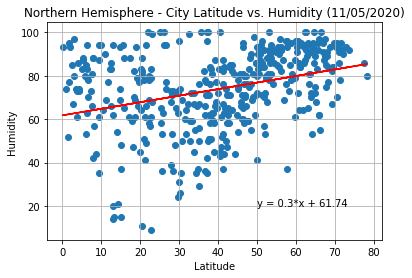

In [106]:
#Northern Hemisphere 
plt.scatter(north_data["Latitude"], north_data["Humidity"])
plt.title( f"Northern Hemisphere - City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(which="major")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_data["Latitude"], north_data["Humidity"])
regressed_values = slope * north_data["Latitude"] + intercept 

plt.plot(north_data["Latitude"], regressed_values, color="r")
plt.annotate(f"y = {round(slope,2)}*x + {round(intercept,2)}", xy=(50,20))

Text(-50, 30, 'y = -0.08*x + 66.23')

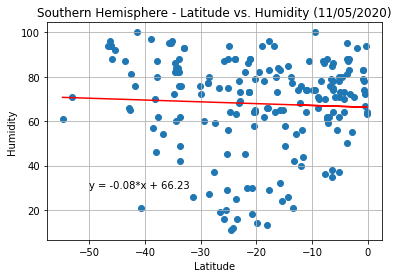

In [107]:
#Southern Hemisphere 
plt.scatter(south_data["Latitude"], south_data["Humidity"])
plt.title( f"Southern Hemisphere - Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(which="major")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_data["Latitude"], south_data["Humidity"])
regressed_values = slope * south_data["Latitude"] + intercept 

plt.plot(south_data["Latitude"], regressed_values, color="r")
plt.annotate(f"y = {round(slope,2)}*x + {round(intercept,2)}", xy=(-50,30))

#### Cloudiness vs. Latitude (for North and South)

Text(55, 30, 'y = 0.48*x + 35.27')

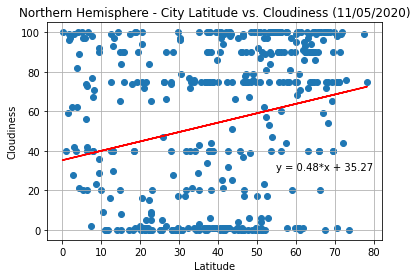

In [109]:
#Northern Hemisphere 
plt.scatter(north_data["Latitude"], north_data["Cloudiness"])
plt.title( f"Northern Hemisphere - City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(which="major")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_data["Latitude"], north_data["Cloudiness"])
regressed_values = slope * north_data["Latitude"] + intercept 

plt.plot(north_data["Latitude"], regressed_values, color="r")
plt.annotate(f"y = {round(slope,2)}*x + {round(intercept,2)}", xy=(55,30))

Text(-55, 30, 'y = 0.0004*x + 54.61')

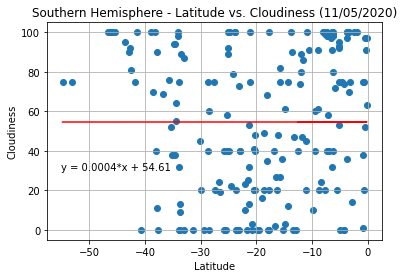

In [112]:
#Southern Hemisphere 
plt.scatter(south_data["Latitude"], south_data["Cloudiness"])
plt.title( f"Southern Hemisphere - Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(which="major")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_data["Latitude"], south_data["Cloudiness"])
regressed_values = slope * south_data["Latitude"] + intercept 

plt.plot(south_data["Latitude"], regressed_values, color="r")
plt.annotate(f"y = {round(slope,4)}*x + {round(intercept,2)}", xy=(-55,30))

#### Wind Speed vs. Latitude (for North and South)

Text(5, 20, 'y = 0.06*x + 1.9')

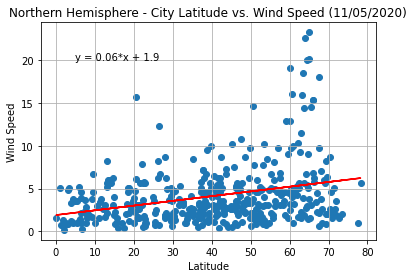

In [114]:
#Northern Hemisphere 
plt.scatter(north_data["Latitude"], north_data["Wind Speed"])
plt.title( f"Northern Hemisphere - City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(which="major")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_data["Latitude"], north_data["Wind Speed"])
regressed_values = slope * north_data["Latitude"] + intercept 

plt.plot(north_data["Latitude"], regressed_values, color="r")
plt.annotate(f"y = {round(slope,2)}*x + {round(intercept,2)}", xy=(5,20))

Text(-45, 13, 'y = -0.04*x + 2.91')

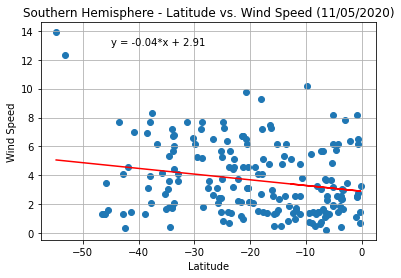

In [116]:
#Southern Hemisphere 
plt.scatter(south_data["Latitude"], south_data["Wind Speed"])
plt.title( f"Southern Hemisphere - Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(which="major")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_data["Latitude"], south_data["Wind Speed"])
regressed_values = slope * south_data["Latitude"] + intercept 

plt.plot(south_data["Latitude"], regressed_values, color="r")
plt.annotate(f"y = {round(slope,2)}*x + {round(intercept,2)}", xy=(-45,13))